In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
data = pd.read_csv("..\\Data\\updated_dataset.csv")

In [24]:
data['Total_Purchase_Value'].head()

0    1698.72
1     985.64
2     639.78
3     183.63
4    1635.12
Name: Total_Purchase_Value, dtype: float64

<Axes: ylabel='Frequency'>

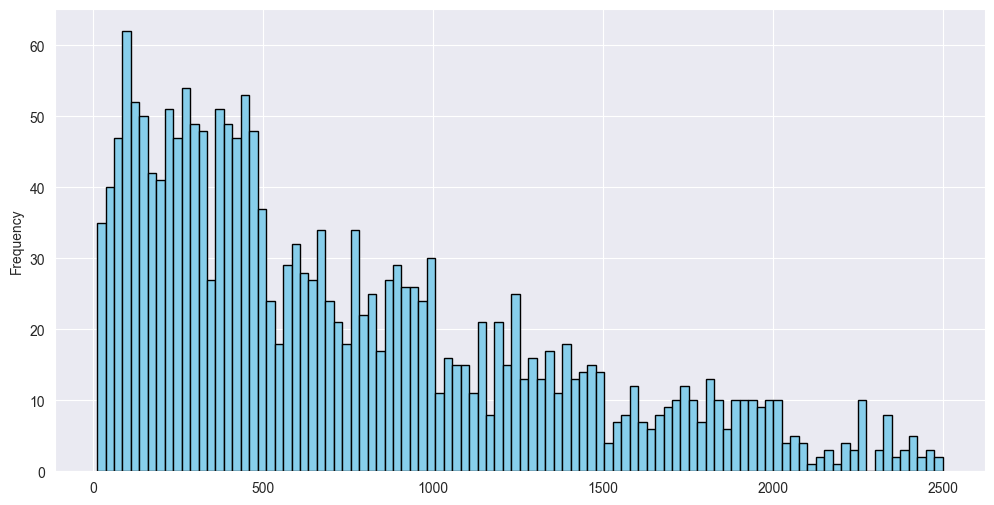

In [25]:
data['Total_Purchase_Value'].plot(kind='hist', bins=100, figsize=(12,6), color='skyblue', edgecolor='black')

In [26]:
total_purchase_value = data[['Total_Purchase_Value']].copy()

In [27]:
total_purchase_value

,Total_Purchase_Value
0,1698.72
1,985.64
2,639.78
3,183.63
4,1635.12
...,...
1995,1344.28
1996,1687.95
1997,1084.76
1998,148.89


In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
# function for checking Dickey–Fuller
def adf_test(series):
    result = adfuller(series)
    print("ADF Stastics : {}".format(result[0]))
    print("P- value : {}".format(result[1]))
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

In [30]:
adf_test(total_purchase_value)

ADF Stastics : -44.016421362121655
P- value : 0.0
Data is stationary


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

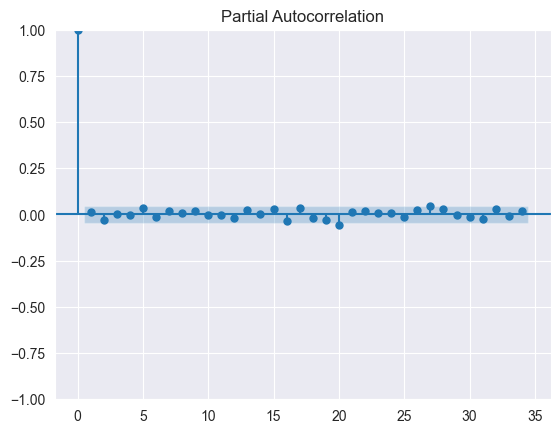

In [32]:
sns.set_style("darkgrid")
pacf = plot_pacf(total_purchase_value['Total_Purchase_Value'].dropna())

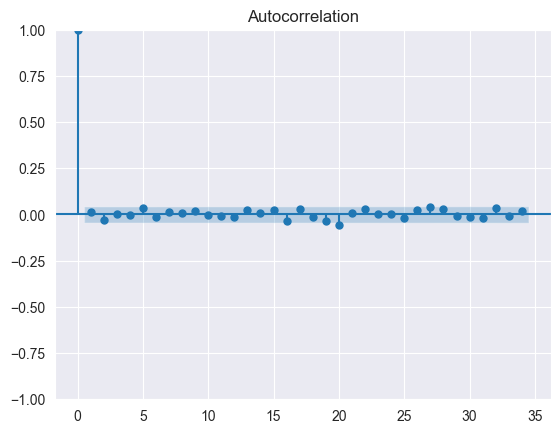

In [33]:
acf = plot_acf(total_purchase_value['Total_Purchase_Value'].dropna()) #value of q is determined by acf

In [38]:
def get_ndiffs_adf(series, alpha=0.05):
    """Determine the order of differencing using the ADF test."""
    d = 0
    p_value = adfuller(series)[1]  # Get p-value from ADF test
    
    while p_value > alpha:  # If not stationary, difference the series
        series = np.diff(series, n=1)
        p_value = adfuller(series)[1]
        d += 1
    
    return d

# Example usage
d = get_ndiffs_adf(total_purchase_value["Total_Purchase_Value"].values)
print(f"Optimal differencing order: {d}")


Optimal differencing order: 0


# Seasonal trend analysis

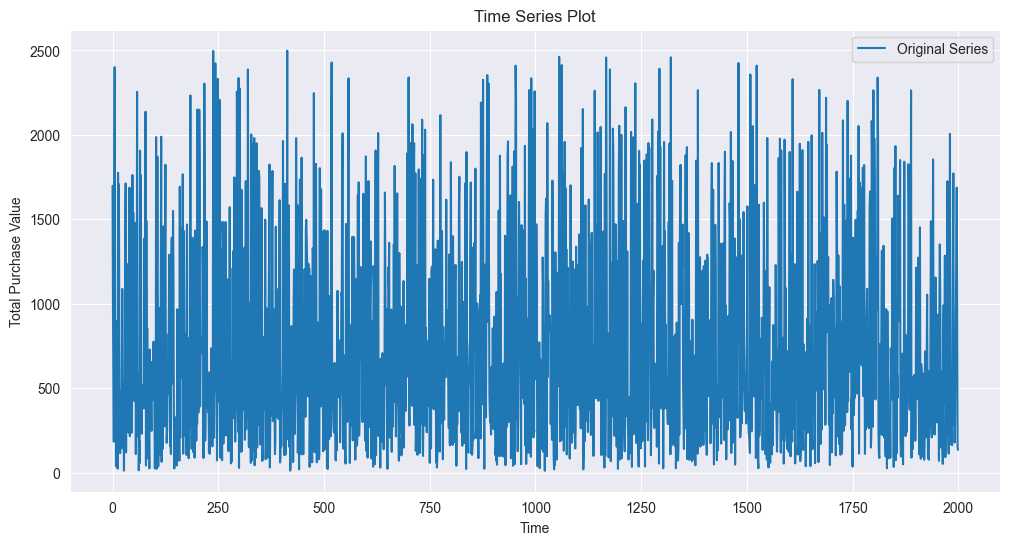

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(total_purchase_value["Total_Purchase_Value"], label="Original Series")
plt.title("Time Series Plot")
plt.xlabel("Time")
plt.ylabel("Total Purchase Value")
plt.legend()
plt.show()


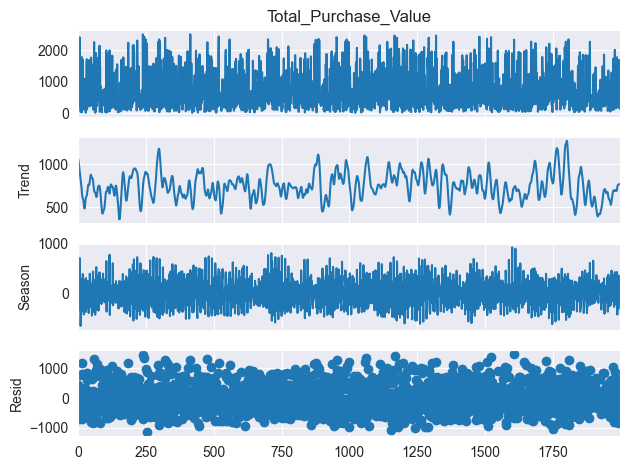

In [41]:
from statsmodels.tsa.seasonal import STL

stl = STL(total_purchase_value["Total_Purchase_Value"], period=12)  # Adjust period based on your data (e.g., 7 for weekly trends)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.show()


In [42]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, _, _ = kpss(total_purchase_value["Total_Purchase_Value"].values, regression='ct')
print(f"KPSS P-Value: {p_value}")

if p_value < 0.05:
    print("Likely presence of a seasonal component.")
else:
    print("No strong seasonal component detected.")


KPSS P-Value: 0.04815662733887378
Likely presence of a seasonal component.


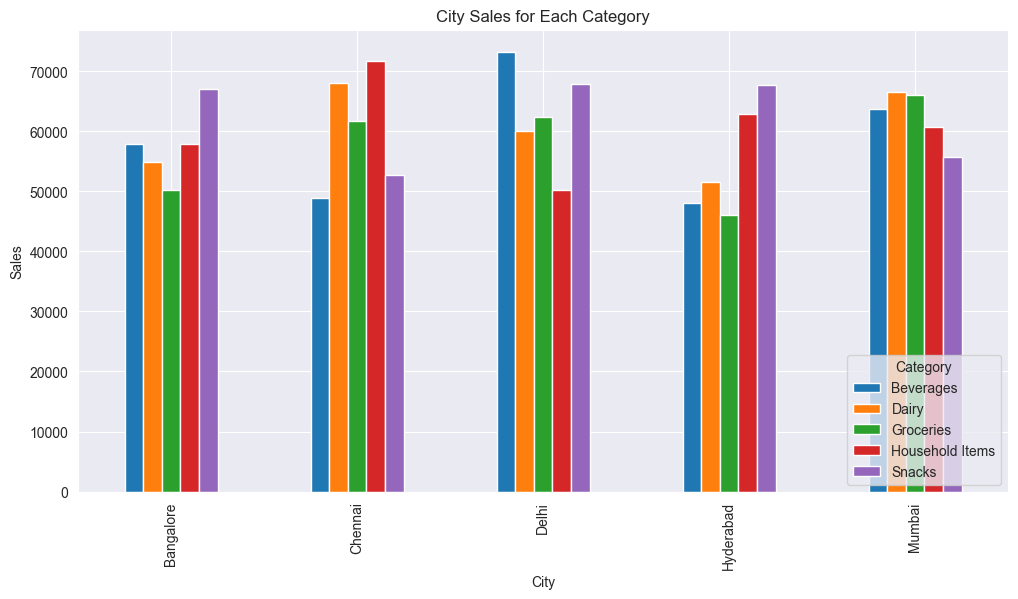

In [76]:
# Assuming 'data' contains the sales data with columns 'Month', 'Category', and 'Sales'
monthly_sales = data.groupby(['City', 'Product_Category'])['Total_Purchase_Value'].sum().unstack()

# Plotting the sales for each category in every month
monthly_sales.plot(kind='bar', figsize=(12, 6))
plt.title('City Sales for Each Category')
plt.xlabel('City')
plt.ylabel('Sales')
plt.legend(title='Category', loc='lower right')
plt.show()